In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("data\\ML-MATT-CompetitionQT2021_train.csv", sep=";")
test_data = pd.read_csv("data\\ML-MATT-CompetitionQT2021_test.csv", sep=";")

In [4]:
train_data.shape, test_data.shape

((36904, 14), (9158, 13))

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36904 entries, 0 to 36903
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         36904 non-null  object 
 1   CellName     36904 non-null  object 
 2   PRBUsageUL   36904 non-null  float64
 3   PRBUsageDL   36904 non-null  float64
 4   meanThr_DL   36904 non-null  float64
 5   meanThr_UL   36904 non-null  float64
 6   maxThr_DL    36904 non-null  float64
 7   maxThr_UL    36904 non-null  float64
 8   meanUE_DL    36904 non-null  float64
 9   meanUE_UL    36904 non-null  float64
 10  maxUE_DL     36904 non-null  int64  
 11  maxUE_UL     36904 non-null  int64  
 12  maxUE_UL+DL  36904 non-null  int64  
 13  Unusual      36904 non-null  int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 3.9+ MB


• **Time** : hour of the day (in the format hh:mm) when the sample was generated.<br>
• **CellName1** : text string used to uniquely identify the cell that generated the current sample. CellName is in the form xαLTE, where x identifies the base station, and α the cell within that base station.<br>
• **PRBUsageUL and PRBUsageDL** : level of resource utilization in that cell measured as the portion of Physical Radio Blocks (PRB) that were in use (%) in the previous 15 minutes. Uplink (UL) and downlink (DL) are measured separately.<br>
• **meanThrDL and meanThrUL** : average carried traffic (in Mbps) during the past 15 minutes. Uplink (UL) and downlink (DL) are measured separately.<br>
• **maxThrDL and maxThrUL** : maximum carried traffic (in Mbps) measured in the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.<br>
• **meanUEDL and meanUEUL** : average number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.<br>
• **maxUEDL and maxUEUL** : maximum number of user equipment (UE) devices that were simultaneously active during the last 15 minutes. Uplink (UL) and downlink (DL) are measured separately.<br>
• **maxUE_UL+DL** : maximum number of user equipment (UE) devices that were active simultaneously in the last 15 minutes, regardless of UL and DL.<br>
• **Unusual** : labels for supervised learning. A value of 0 determines that the sample corresponds to normal operation, a value of 1 identifies unusual behavior.<br>

In [6]:
train_data.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,12.3848,1.4019,0.3927,0.0438,16.6522,0.6806,1.1293,1.0491,5,3,8,1
1,9:45,1BLTE,22.0438,2.0016,0.5620,0.2697,10.3994,1.1771,1.4480,1.1630,6,5,11,1
2,7:45,9BLTE,0.5105,0.4258,0.0152,0.0106,0.2755,0.1685,1.0379,1.0535,1,2,3,1
3,2:45,4ALTE,1.9963,1.1513,0.9908,0.0245,64.7465,0.8747,1.0766,1.0526,3,2,5,1
4,3:30,10BLTE,0.3030,0.4040,0.0160,0.0130,0.3480,0.1680,1.0110,1.0110,2,1,3,0


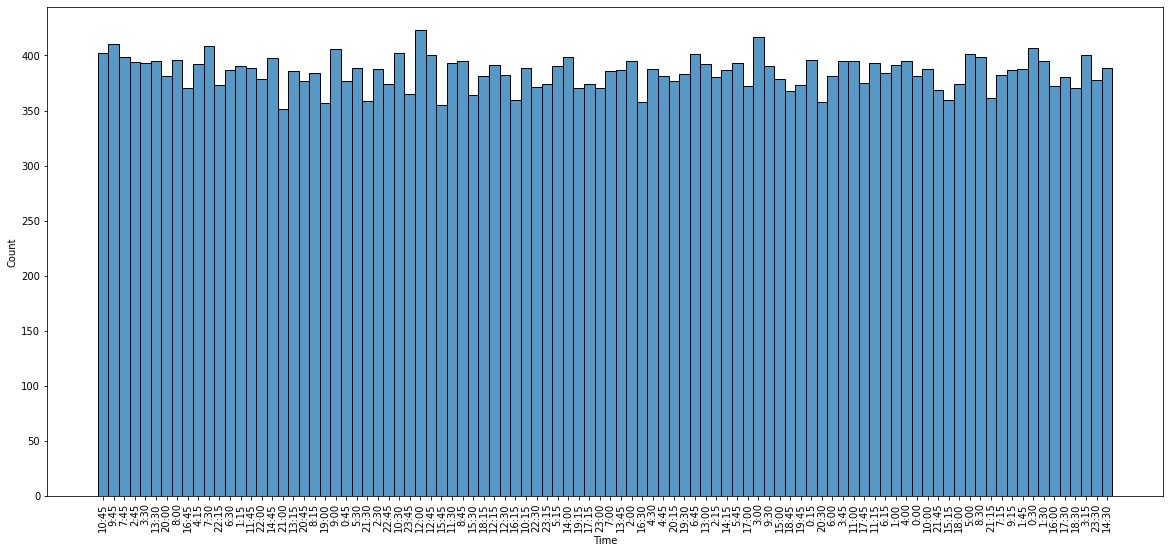

In [7]:
plt.figure(figsize=(20, 9))
sns.histplot(train_data["Time"]);
plt.xticks(rotation=90);

In [8]:
train_data["CellName"].unique().shape

(33,)

In [9]:
train_data[["hour", "minute"]] = train_data["Time"].str.split(":", expand=True).astype(int)

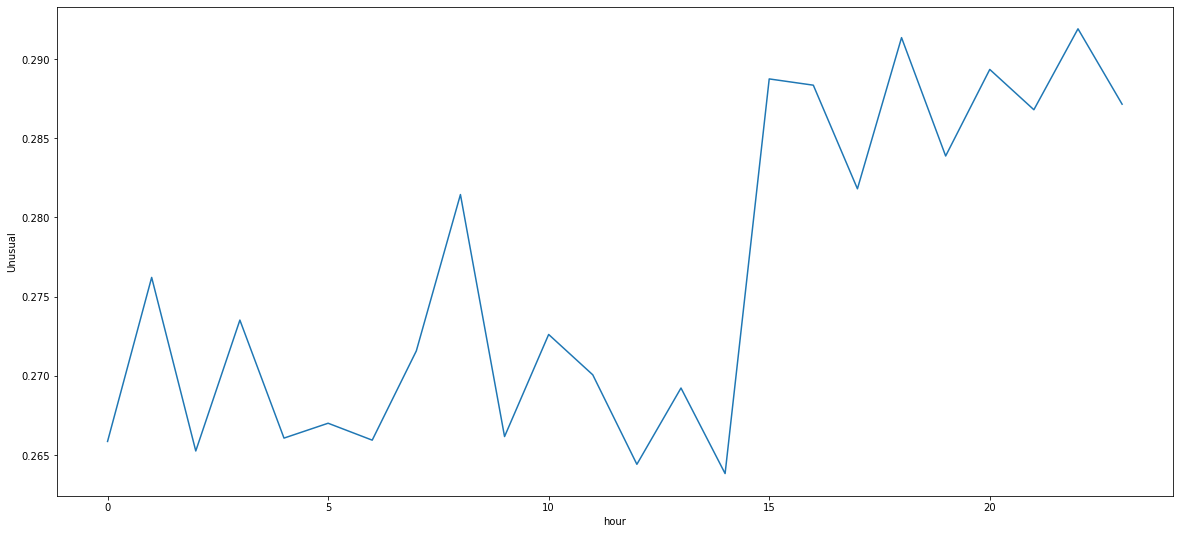

In [10]:
plt.figure(figsize=(20, 9))
sns.lineplot(x="hour", y="Unusual", data=train_data.groupby(["hour"]).agg({"Unusual": "mean"}).reset_index());

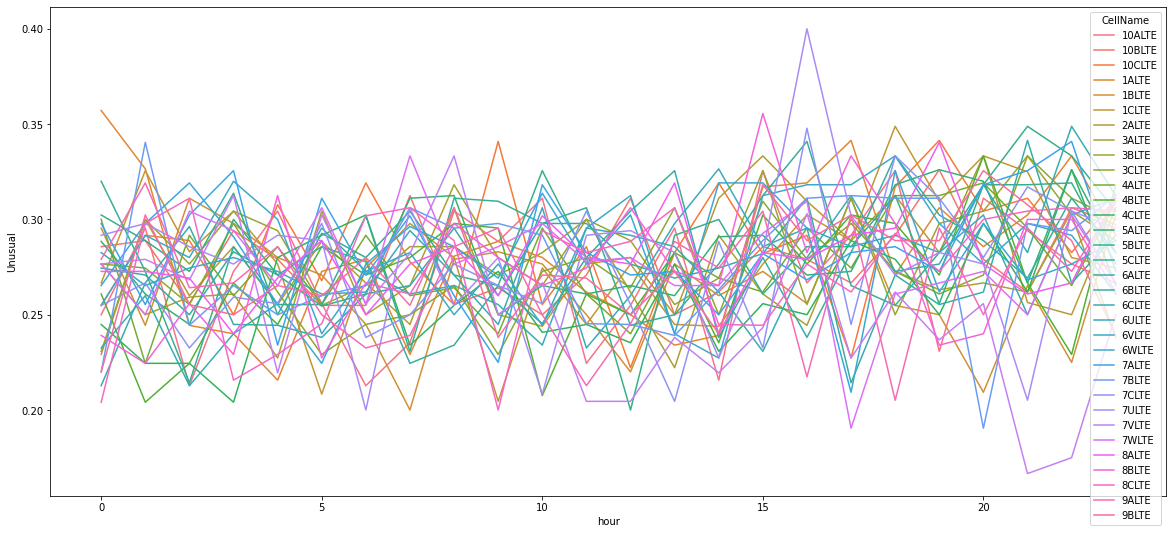

In [11]:
plt.figure(figsize=(20, 9))
sns.lineplot(x="hour", y="Unusual", data=train_data.groupby(["hour", "CellName"]).agg({"Unusual": "mean"}).reset_index(), hue="CellName");

In [12]:
train_data.groupby("CellName").agg({"Time": ["nunique", "count"], "hour": ["nunique", "count"], "minute": ["nunique", "count"]}).T

CellName        10ALTE  10BLTE  10CLTE  1ALTE  1BLTE  1CLTE  2ALTE  3ALTE  \
Time   nunique      96      96      96     96     96     96     96     96   
       count      1121    1107    1117   1122   1117   1120   1116   1107   
hour   nunique      24      24      24     24     24     24     24     24   
       count      1121    1107    1117   1122   1117   1120   1116   1107   
minute nunique       4       4       4      4      4      4      4      4   
       count      1121    1107    1117   1122   1117   1120   1116   1107   

CellName        3BLTE  3CLTE  ...  7BLTE  7CLTE  7ULTE  7VLTE  7WLTE  8ALTE  \
Time   nunique     96     96  ...     96     96     96     96     96     96   
       count     1117   1131  ...   1128   1096   1120   1007   1116   1142   
hour   nunique     24     24  ...     24     24     24     24     24     24   
       count     1117   1131  ...   1128   1096   1120   1007   1116   1142   
minute nunique      4      4  ...      4      4      4      4      4      4   
       count     1117   1131  ...   1128   1096   1120   1007   1116   1142   

CellName        8BLTE  8CLTE  9ALTE  9BLTE  
Time   nunique     96     96     96     96  
       count     1118   1137   1099   1116  
hour   nunique     24     24     24     24  
       count     1118   1137   1099   1116  
minute nunique      4      4      4      4  
       count     1118   1137   1099   1116  

[6 rows x 33 columns]

In [13]:
24 * 4, 24 * 4 * 33 * 11

(96, 34848)

In [14]:
train_data.loc[train_data.duplicated(keep=False)].nunique()

Time           28
CellName        1
PRBUsageUL      1
PRBUsageDL      1
meanThr_DL      1
meanThr_UL      1
maxThr_DL       1
maxThr_UL       1
meanUE_DL       2
meanUE_UL       2
maxUE_DL        2
maxUE_UL        2
maxUE_UL+DL     3
Unusual         1
hour            9
minute          4
dtype: int64

In [15]:
train_data.isna().sum()

Time           0
CellName       0
PRBUsageUL     0
PRBUsageDL     0
meanThr_DL     0
meanThr_UL     0
maxThr_DL      0
maxThr_UL      0
meanUE_DL      0
meanUE_UL      0
maxUE_DL       0
maxUE_UL       0
maxUE_UL+DL    0
Unusual        0
hour           0
minute         0
dtype: int64

In [16]:
train_data.loc[train_data.duplicated(subset=["Time", "CellName"])].shape

(33736, 16)

In [17]:
tmp_sorted = train_data.sort_values(by=["CellName", "hour", "minute"])

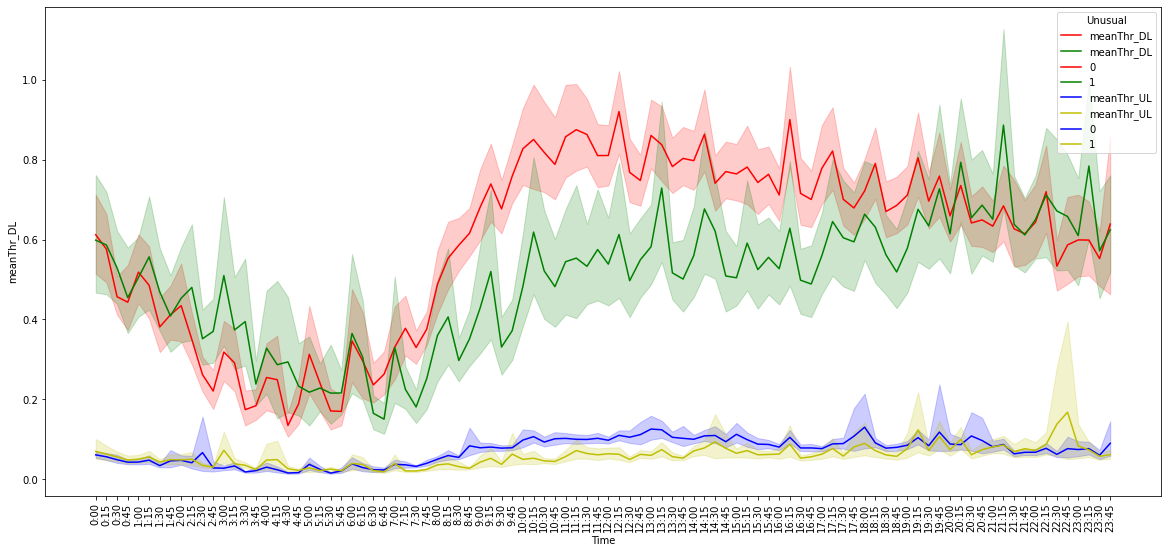

In [18]:
plt.figure(figsize=(20, 9))
sns.lineplot(x="Time", y="meanThr_DL", data=tmp_sorted, sort=False, label="meanThr_DL", hue="Unusual", palette=['r', 'g']);
sns.lineplot(x="Time", y="meanThr_UL", data=tmp_sorted, sort=False, label="meanThr_UL", hue="Unusual", palette=['b', 'y']);
plt.xticks(rotation=90);
# plt.legend();

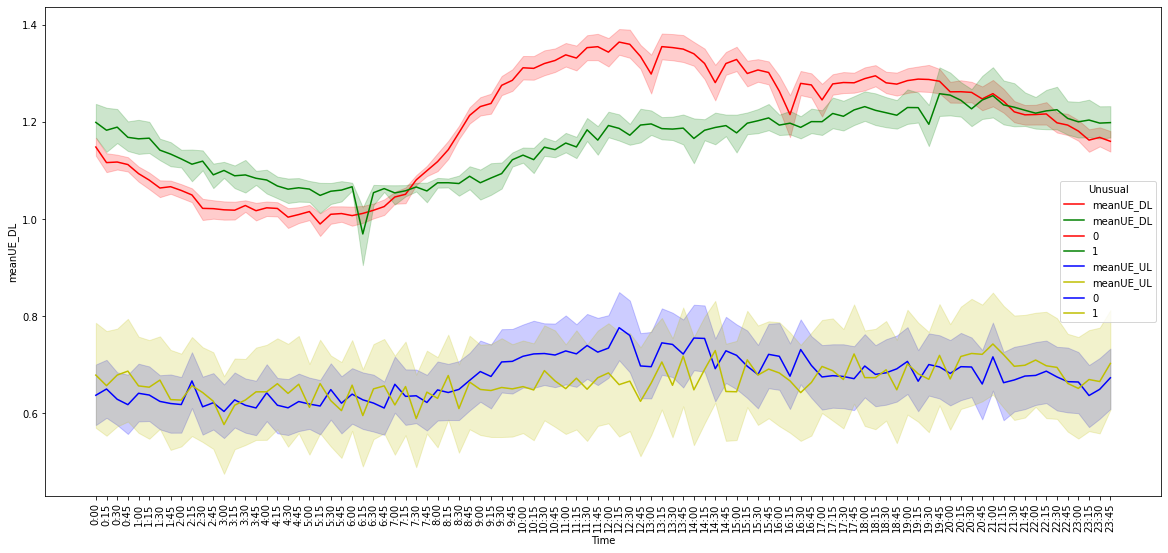

In [19]:
plt.figure(figsize=(20, 9))
sns.lineplot(x="Time", y="meanUE_DL", data=tmp_sorted, sort=False, label="meanUE_DL", hue="Unusual", palette=['r', 'g']);
sns.lineplot(x="Time", y="meanUE_UL", data=tmp_sorted, sort=False, label="meanUE_UL", hue="Unusual", palette=['b', 'y']);
plt.xticks(rotation=90);
# plt.legend();

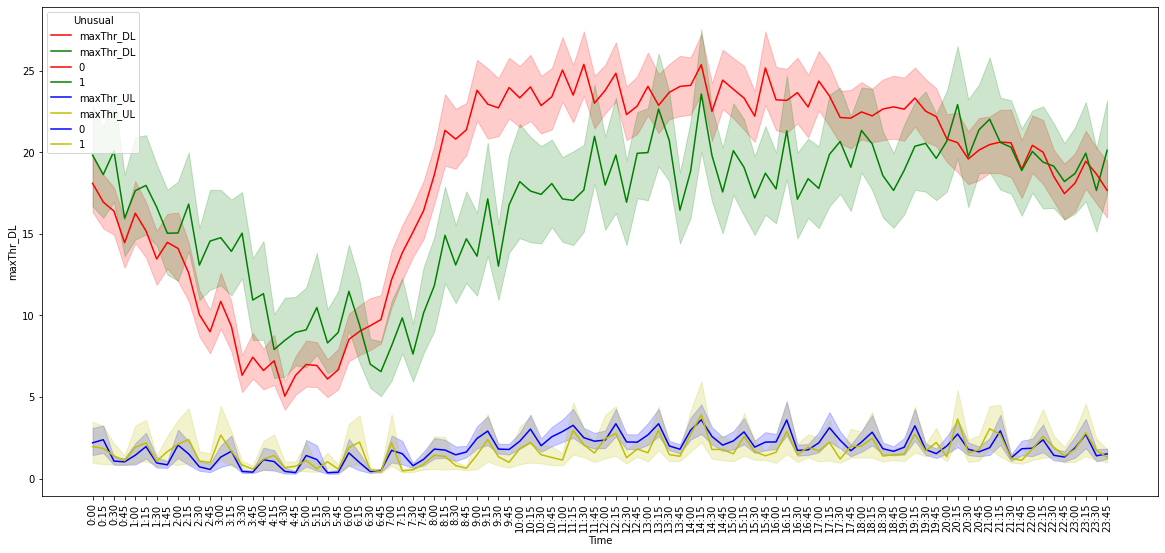

In [20]:
plt.figure(figsize=(20, 9))
sns.lineplot(x="Time", y="maxThr_DL", data=tmp_sorted, sort=False, label="maxThr_DL", hue="Unusual", palette=['r', 'g']);
sns.lineplot(x="Time", y="maxThr_UL", data=tmp_sorted, sort=False, label="maxThr_UL", hue="Unusual", palette=['b', 'y']);
plt.xticks(rotation=90);
# plt.legend();

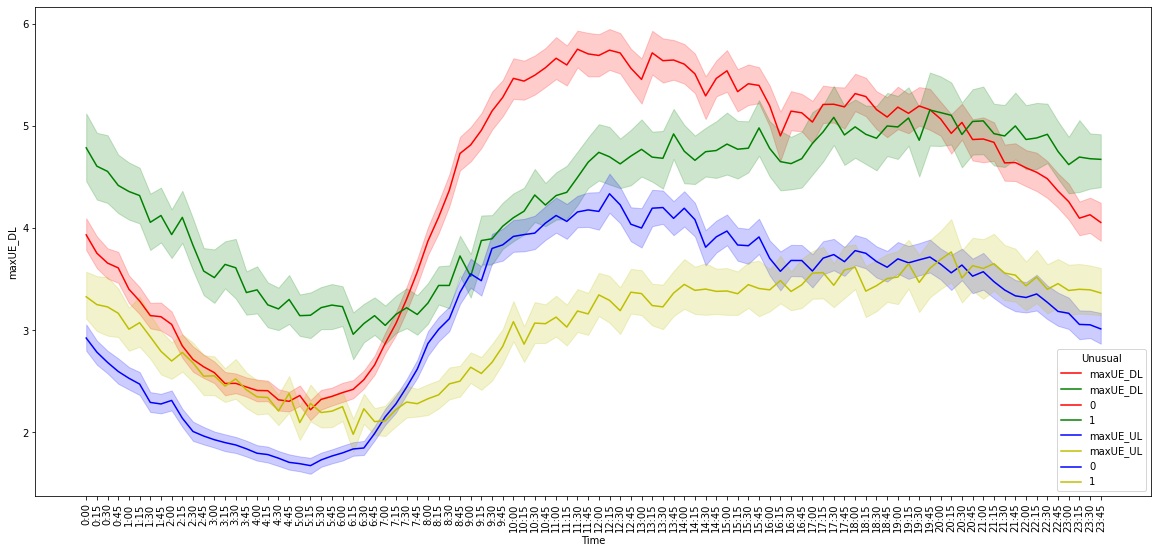

In [21]:
plt.figure(figsize=(20, 9))
sns.lineplot(x="Time", y="maxUE_DL", data=tmp_sorted, sort=False, label="maxUE_DL", hue="Unusual", palette=['r', 'g']);
sns.lineplot(x="Time", y="maxUE_UL", data=tmp_sorted, sort=False, label="maxUE_UL", hue="Unusual", palette=['b', 'y']);
plt.xticks(rotation=90);
# plt.legend();

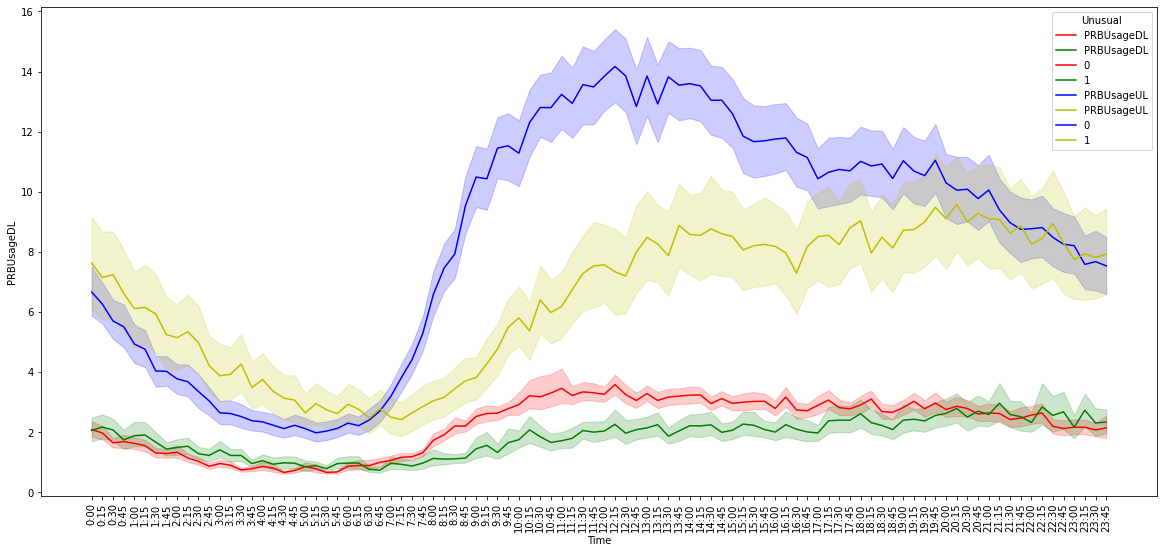

In [22]:
plt.figure(figsize=(20, 9))
sns.lineplot(x="Time", y="PRBUsageDL", data=tmp_sorted, sort=False, label="PRBUsageDL", hue="Unusual", palette=['r', 'g']);
sns.lineplot(x="Time", y="PRBUsageUL", data=tmp_sorted, sort=False, label="PRBUsageUL", hue="Unusual", palette=['b', 'y']);
plt.xticks(rotation=90);
# plt.legend();

In [23]:
del tmp_sorted

<AxesSubplot:xlabel='Unusual', ylabel='count'>

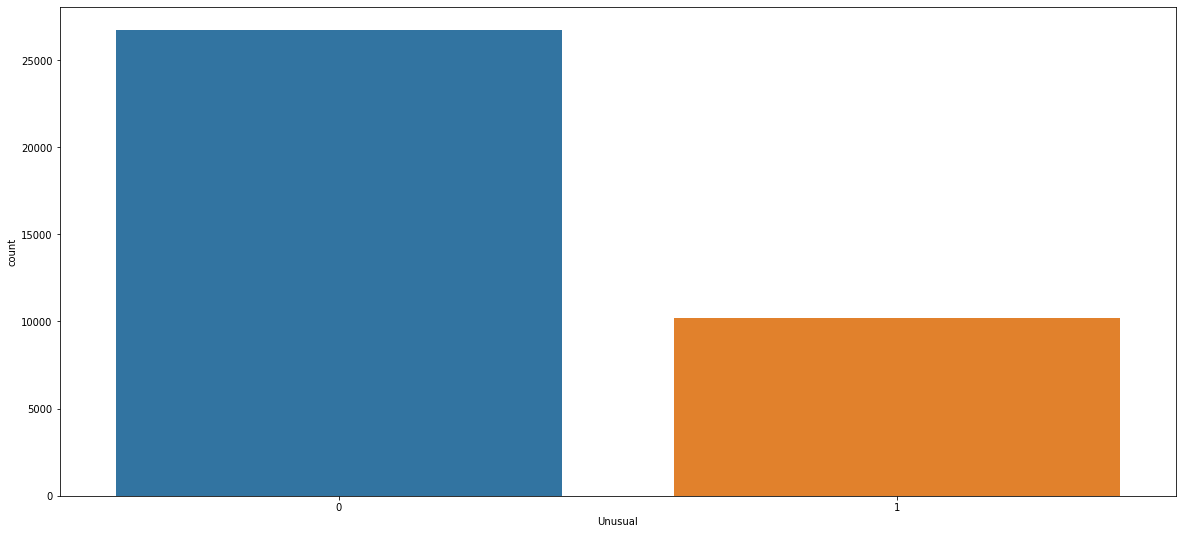

In [24]:
plt.figure(figsize=(20, 9))
sns.countplot(data=train_data, x="Unusual")

In [25]:
DO_FEATURES_PLOT = False

In [26]:
if DO_FEATURES_PLOT:
    # fig, axs = plt.subplots(figsize=(20, 9), nrows=17, ncols=2, sharex=True)
    cols_plot = ["meanThr_DL"]
    for ix, cell in enumerate(train_data["CellName"].unique()):
        cell_data = train_data.query("CellName == @cell")
        cell_data = cell_data.sort_values(by=["hour", "minute"])
        cell_data = cell_data.reset_index(drop=True)
        # plt.figure(figsize=(20, 9))
        if ix % 2 == 0:
            plt.figure(figsize=(30, 9))
        plt.subplot(1, 2, ix % 2 + 1)

        for col in cols_plot:
            plt.plot(cell_data[col], label=col)
            plt.scatter(x=cell_data.query("Unusual == 1")[col].index, y=cell_data.query("Unusual == 1")[col], c="r", alpha=0.5, marker="x")
            # plt.scatter(cell_data[col], c="r")
        plt.title(cell)
        plt.legend()
        plt.grid()

In [27]:
train_data["Unusual"].mean()

0.27593214827660956

In [28]:
train_data["morning"] = ((train_data["hour"] >= 6 ) & (train_data["hour"] < 11)).astype(int)
train_data["afternoon"] = ((train_data["hour"] >= 11 ) & (train_data["hour"] < 1)).astype(int)
train_data["night"] = ((train_data["hour"] >= 1 ) & (train_data["hour"] < 6)).astype(int)

In [30]:
train_data.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual,hour,minute,morning,afternoon,night
0,10:45,3BLTE,12.3848,1.4019,0.3927,0.0438,16.6522,0.6806,1.1293,1.0491,5,3,8,1,10,45,1,0,0
1,9:45,1BLTE,22.0438,2.0016,0.5620,0.2697,10.3994,1.1771,1.4480,1.1630,6,5,11,1,9,45,1,0,0
2,7:45,9BLTE,0.5105,0.4258,0.0152,0.0106,0.2755,0.1685,1.0379,1.0535,1,2,3,1,7,45,1,0,0
3,2:45,4ALTE,1.9963,1.1513,0.9908,0.0245,64.7465,0.8747,1.0766,1.0526,3,2,5,1,2,45,0,0,1
4,3:30,10BLTE,0.3030,0.4040,0.0160,0.0130,0.3480,0.1680,1.0110,1.0110,2,1,3,0,3,30,0,0,1


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [32]:
pca_2 = PCA(n_components=2, random_state=42)
scaler = StandardScaler()

In [82]:
filter_cell = '7VLTE'

In [83]:
X, y = train_data.query("CellName == @filter_cell").drop(columns=["CellName", "Time", "Unusual"]), train_data.query("CellName == @filter_cell")["Unusual"]

In [84]:
X_scaled = scaler.fit_transform(X)
X_pca2 = pca_2.fit_transform(X_scaled)

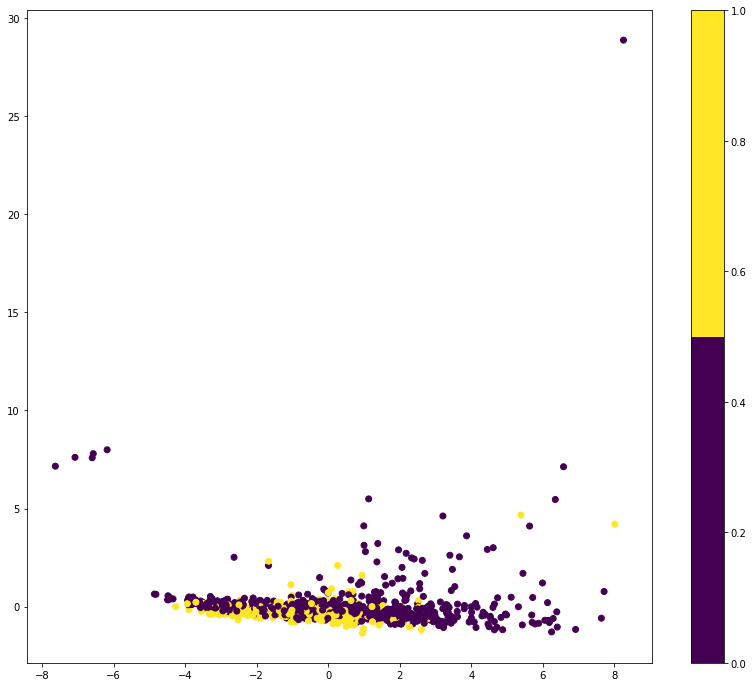

In [85]:
plt.figure(figsize=(14, 12))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y, cmap=plt.cm.get_cmap('viridis', 2))
plt.colorbar()

In [86]:
pca_3 = PCA(n_components=3, random_state=42)

In [87]:
X_pca3 = pca_3.fit_transform(X_scaled)

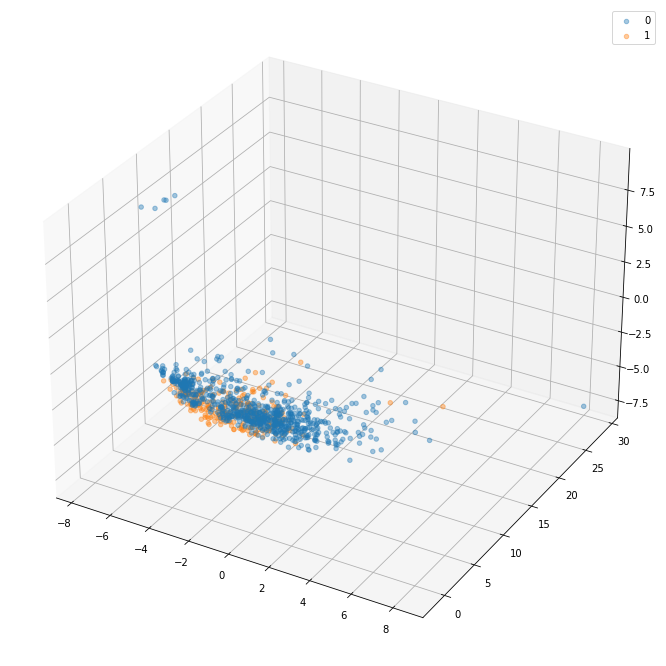

In [88]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca3[y==0, 0], X_pca3[y==0, 1], X_pca3[y==0, 2], label=0, alpha=0.4)
ax.scatter(X_pca3[y==1, 0], X_pca3[y==1, 1], X_pca3[y==1, 2], label=1, alpha=0.4)
plt.legend()
# ax.view_init(-150, 80)
plt.show()

In [89]:
train_data.groupby("CellName").agg({"Unusual": "mean"})

,Unusual
CellName,
10ALTE,0.271186
10BLTE,0.278229
10CLTE,0.286482
1ALTE,0.280749
1BLTE,0.264100
1CLTE,0.280357
2ALTE,0.280466
3ALTE,0.271003
3BLTE,0.282005
